In [20]:
import pandas as pd
import geopandas as gpd 

import seaborn as sns 
import folium 

from matplotlib import pyplot as plt

from datetime import datetime

In [21]:
sheet = pd.read_html('https://docs.google.com/spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/pubhtml#')

tests_state = sheet[1]

tests_state.columns = tests_state.iloc[0]

tests_state = tests_state.drop([0, 1])

tests_state = tests_state.drop(1.0, axis=1)

In [22]:
tests_state.head()

,State,Positive,Negative,Pending,Hospitalized,Death,Total,Last update (ET),Check time (ET)
2,AK,69,2319,13,3,1,2401,3/26 21:00,3/27 09:43
3,AL,538,3593,NaN,NaN,3,4131,3/27 00:00,3/27 10:14
4,AR,351,1533,0,41,3,1884,3/27 00:00,3/27 09:21
5,AS,0,NaN,0,NaN,0,0,3/27 00:00,3/27 08:15
6,AZ,577,347,33,66,8,957,3/26 00:00,3/27 09:58


In [23]:
state_names = pd.read_html('https://developers.google.com/public-data/docs/canonical/states_csv')[0]

In [24]:
states = gpd.read_file('gz_2010_us_040_00_5m.json')

In [25]:
states = states.merge(state_names, right_on='name', left_on='NAME')

In [26]:
states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",AL,32.318231,-86.902298,Alabama
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...",AK,63.588753,-154.493062,Alaska
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",AZ,34.048928,-111.093731,Arizona
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",AR,35.201050,-91.831833,Arkansas
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",CA,36.778261,-119.417932,California


In [27]:
tests = states.merge(tests_state, left_on='state', right_on='State')

tests.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name,State,Positive,Negative,Pending,Hospitalized,Death,Total,Last update (ET),Check time (ET)
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",AL,32.318231,-86.902298,Alabama,AL,538,3593,NaN,NaN,3,4131,3/27 00:00,3/27 10:14
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...",AK,63.588753,-154.493062,Alaska,AK,69,2319,13,3,1,2401,3/26 21:00,3/27 09:43
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",AZ,34.048928,-111.093731,Arizona,AZ,577,347,33,66,8,957,3/26 00:00,3/27 09:58
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",AR,35.201050,-91.831833,Arkansas,AR,351,1533,0,41,3,1884,3/27 00:00,3/27 09:21
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",CA,36.778261,-119.417932,California,CA,3006,17380,57400,253,65,77786,3/25 17:00,3/26 22:50


In [28]:
tests[['Positive', 'Negative', 'Total']] = tests[['Positive', 'Negative', 'Total']].apply(pd.to_numeric, axis=1)

In [29]:
tests['positive_ratio'] = tests['Positive'] / tests['Total']

In [30]:
tests.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
tests = tests.to_crs(epsg=2163)

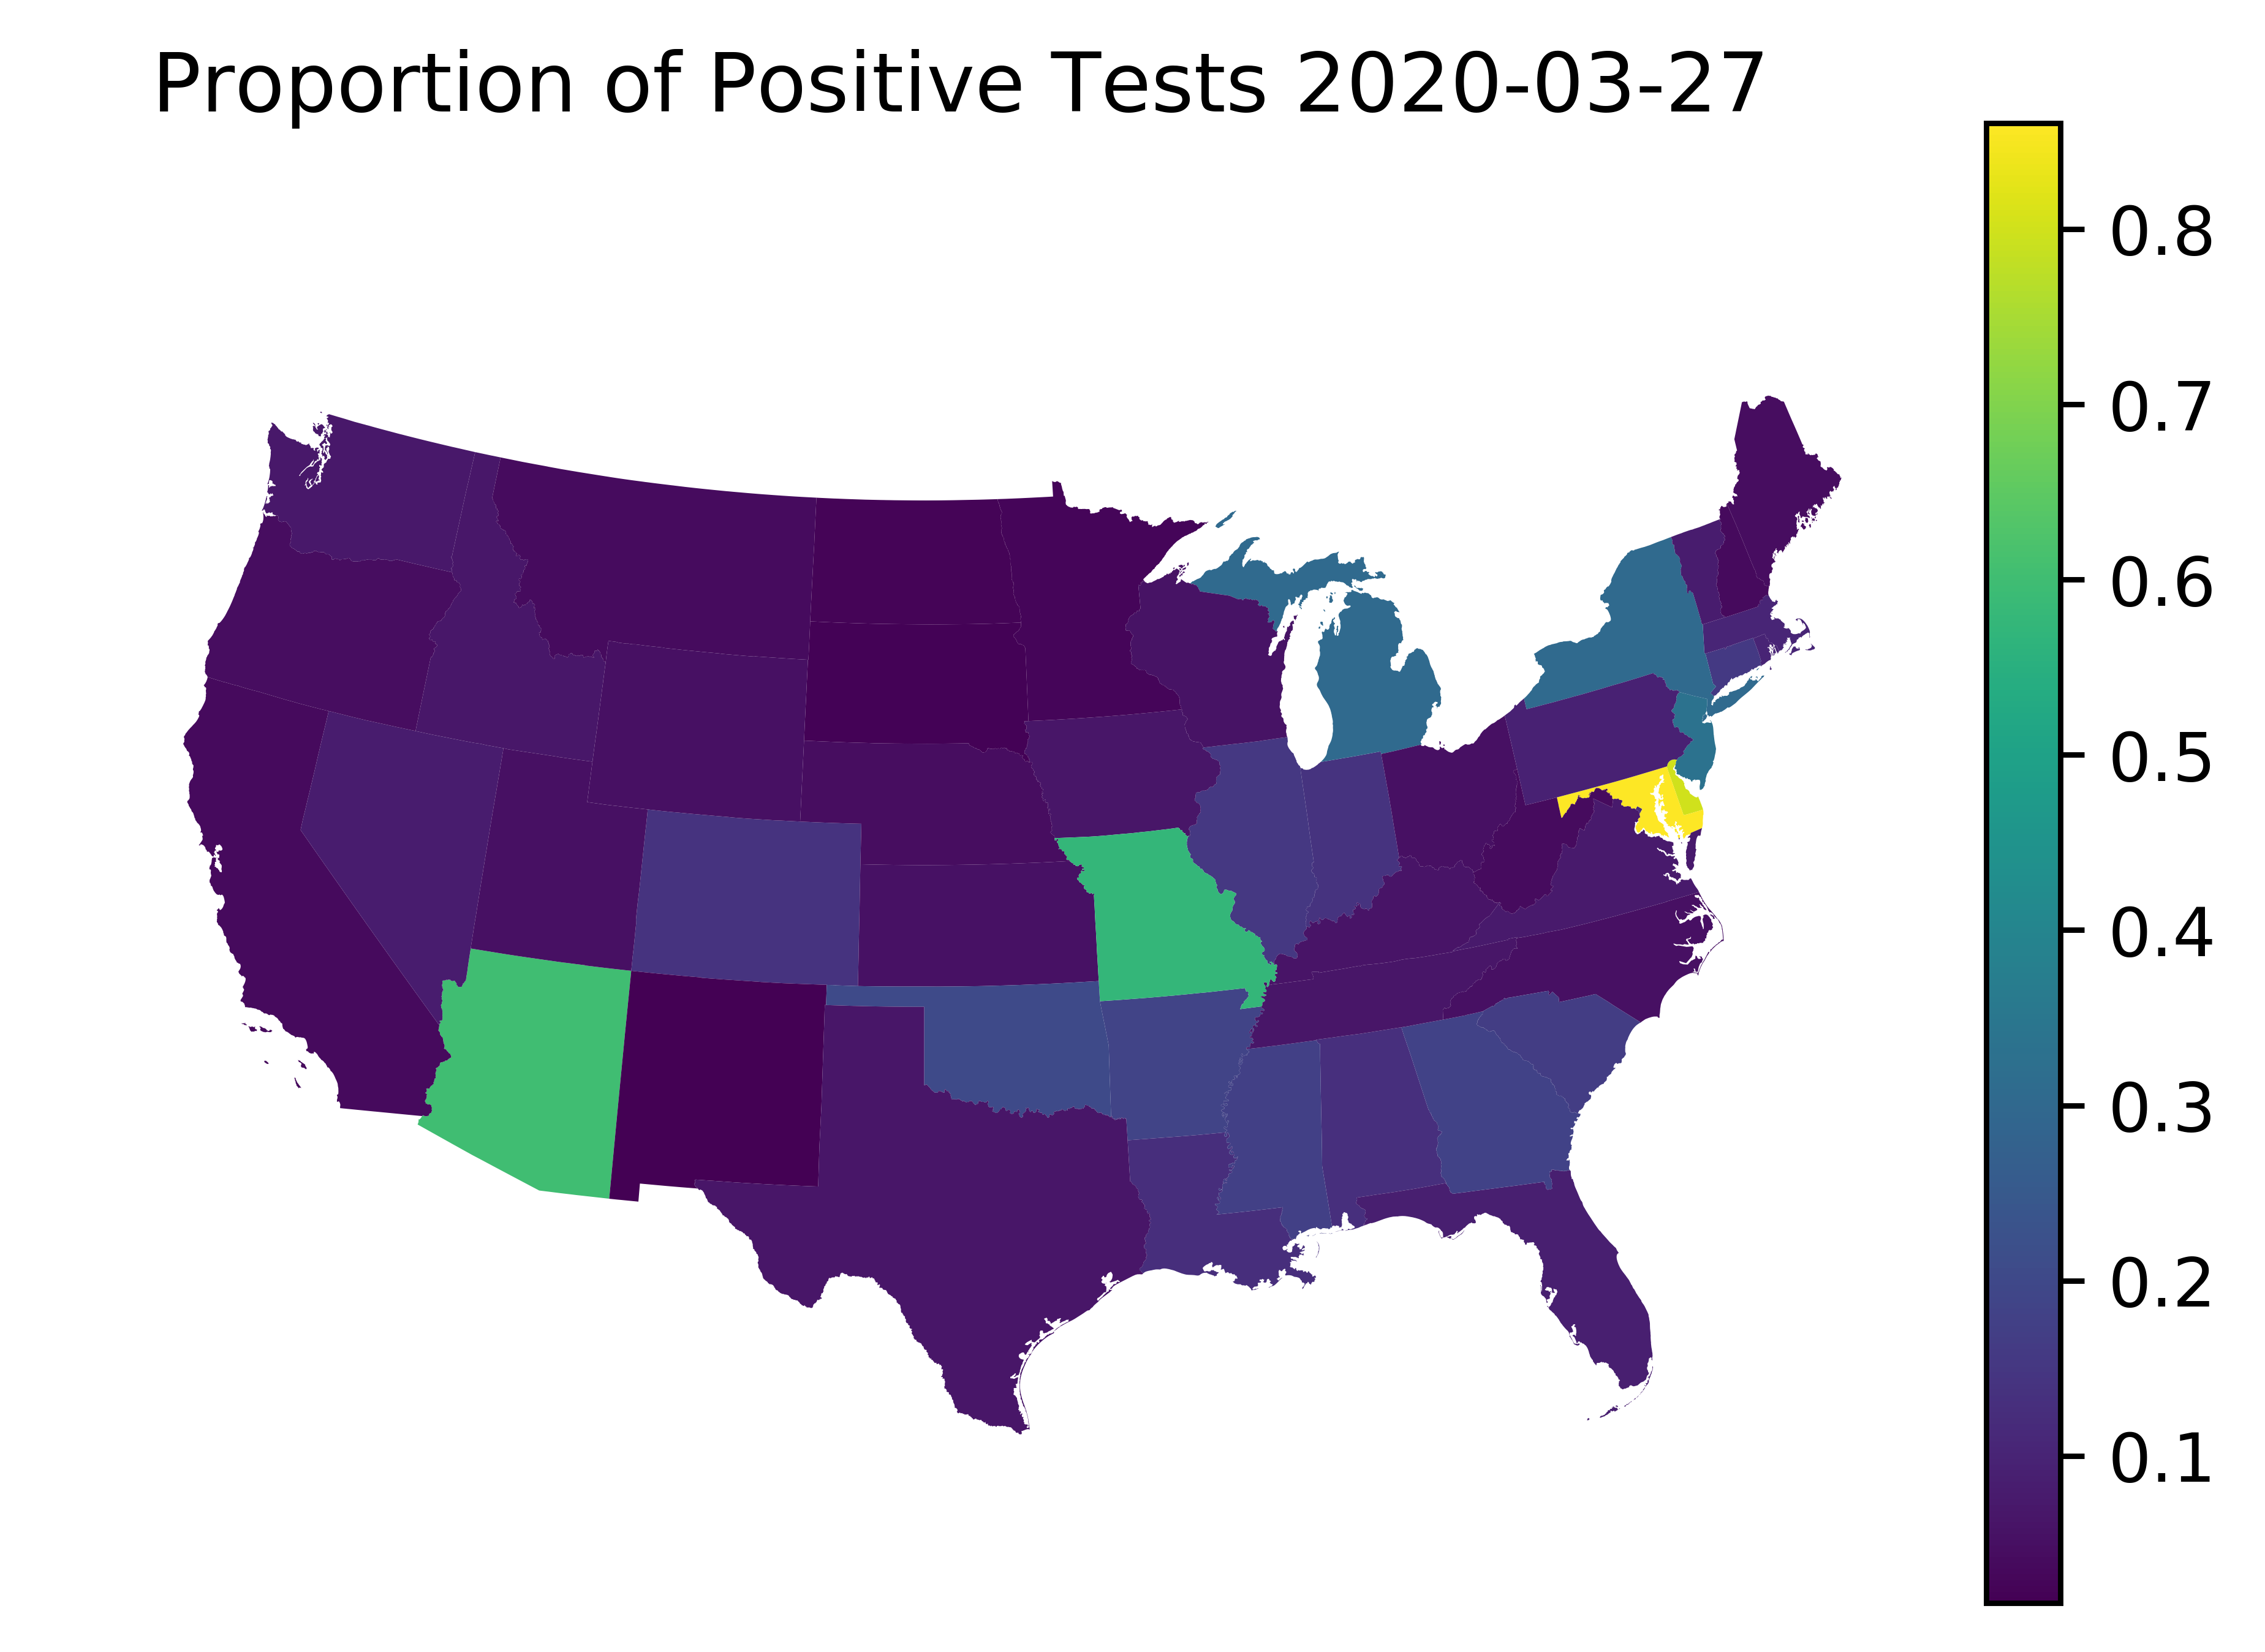

In [32]:
today = datetime.today().isoformat()[:10]

fig, ax = plt.subplots(dpi=800)

ax.axis('off')

ax.set_xlim(-2400000, 2600000)
ax.set_ylim(-2500000, 1400000)

ax.set_title(f'Proportion of Positive Tests {today}')

tests.plot(column='positive_ratio', ax=ax, legend=True)

plt.savefig(f'figs/us_positive_tests_{today}.png')

In [33]:
tests.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name,State,Positive,Negative,Pending,Hospitalized,Death,Total,Last update (ET),Check time (ET),positive_ratio
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((1145349.139 -1553105.505, 1149...",AL,32.318231,-86.902298,Alabama,AL,538,3593,NaN,NaN,3,4131,3/27 00:00,3/27 10:14,0.130235
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-3671340.791 2756346.929, -367...",AK,63.588753,-154.493062,Alaska,AK,69,2319,13,3,1,2401,3/26 21:00,3/27 09:43,0.028738
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-1111065.933 -805474.753, -1110710.3...",AZ,34.048928,-111.093731,Arizona,AZ,577,347,33,66,8,957,3/26 00:00,3/27 09:58,0.602926
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((557903.093 -1310326.685, 557483.643 ...",AR,35.201050,-91.831833,Arkansas,AR,351,1533,0,41,3,1884,3/27 00:00,3/27 09:21,0.186306
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-1942660.918 -528577.162, -194...",CA,36.778261,-119.417932,California,CA,3006,17380,57400,253,65,77786,3/25 17:00,3/26 22:50,0.038644


In [34]:
# change column names to have nicer display in map
tests = tests.drop('State', axis=1).rename({'NAME': 'State'}, axis=1)

census = pd.read_csv('nst-est2019-alldata.csv')
tests = tests.merge(census[['NAME', 'POPESTIMATE2019']], how='left', left_on='State', right_on='NAME')
tests = tests.rename({'POPESTIMATE2019': 'Population in 2019'}, axis=1)

In [38]:
m = folium.Map(tiles='CartoDB positron',
               zoom_start=4,
               location=(39.8283, -98.5795))

In [39]:
cp = folium.Choropleth(tests,
                  data=tests, 
                  key_on='feature.properties.GEO_ID',
                  fill_color='YlOrRd', 
                  columns=['GEO_ID', 'positive_ratio'],
                  legend_name=f'Proportion of Positive Tests out of total tested, last updated {today}').add_to(m)

cp.geojson.add_child(
    folium.features.GeoJsonTooltip(['State', 'Positive', 'Negative', 'Total', 'Population in 2019'])
);

In [40]:
m.save('map.html')

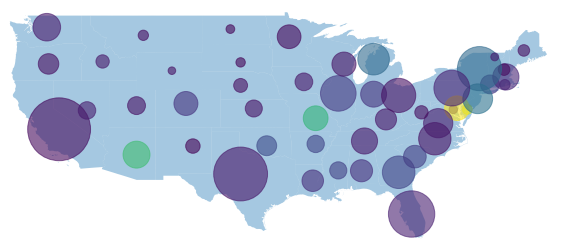

In [19]:
states_proj = states.to_crs(epsg=2163)

tests_proj = tests.copy()
tests_proj.geometry = gpd.points_from_xy(tests['longitude'], tests['latitude'])
tests_proj = tests_proj.to_crs(epsg=2163)

fig, ax = plt.subplots(figsize=(10, 10))
states.to_crs(epsg=4326).plot(alpha=0.4, linewidth=10, ax=ax)
tests_proj.plot(markersize=tests_proj['Population in 2019'] * 0.0001, 
                ax=ax, 
                cmap='viridis', 
                column='positive_ratio',
                alpha=0.6)

ax.axis('off')

ax.set_xlim(-125, -65)
ax.set_ylim(25, 50)
plt.savefig(f'figs/pop_inclusive_map_{today}.png')